<a href="https://colab.research.google.com/github/insomnia98/2021-LTspice-practice/blob/main/WFV_XGBoost_Bayesian_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=b1d733fb90fd122bab8e81565b52fae01fbe46621ac28753ffb1ef0e6d59e4fb
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


### 설치 모듈

In [3]:
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
from bayes_opt import BayesianOptimization
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot, skew
from IPython.display import display
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from PIL import Image
from sklearn.model_selection import train_test_split

### RGB 가중평균

In [14]:
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    t_mean = (r*5.0+g*4.7+b*4.4)/(r+g+b)
    return t_mean

In [15]:
df=pd.read_csv('/content/drive/MyDrive/0630img/test.csv',index_col='col')

In [16]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
col,,,,,,,,,,,,,,,,,,,,,
0th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 이미지 업로드

In [17]:
img=[x for x in range(len(df.columns))]
img_t=[x for x in range(len(df.columns))]

img[0] = Image.open('/content/drive/MyDrive/0630img/1_n21.png')
img[1]= Image.open('/content/drive/MyDrive/0630img/2_n22.png')
img[2] = Image.open('/content/drive/MyDrive/0630img/3_n23.png')
img[3] = Image.open('/content/drive/MyDrive/0630img/4_n31.png')
img[4]= Image.open('/content/drive/MyDrive/0630img/5_n33.png')
img[5] = Image.open('/content/drive/MyDrive/0630img/6_n34.png')

img[6] = Image.open('/content/drive/MyDrive/0630img/21_n49.png')
img[7]= Image.open('/content/drive/MyDrive/0630img/22_n50.png')
img[8] = Image.open('/content/drive/MyDrive/0630img/23_n51.png')
img[9] = Image.open('/content/drive/MyDrive/0630img/24_n52.png')
img[10]= Image.open('/content/drive/MyDrive/0630img/25_n53.png')
img[11] = Image.open('/content/drive/MyDrive/0630img/26_n54.png')

img[12] = Image.open('/content/drive/MyDrive/0630img/41_n69.png')
img[13]= Image.open('/content/drive/MyDrive/0630img/42_n70.png')
img[14] = Image.open('/content/drive/MyDrive/0630img/43_n71.png')
img[15] = Image.open('/content/drive/MyDrive/0630img/44_n72.png')
img[16]= Image.open('/content/drive/MyDrive/0630img/45_n73.png')
img[17] = Image.open('/content/drive/MyDrive/0630img/46_n74.png')


img[18] = Image.open('/content/drive/MyDrive/0630img/61_n89.png')
img[19]= Image.open('/content/drive/MyDrive/0630img/62_n90.png')
img[20] = Image.open('/content/drive/MyDrive/0630img/63_n91.png')
img[21] = Image.open('/content/drive/MyDrive/0630img/64_n92.png')
img[22]= Image.open('/content/drive/MyDrive/0630img/65_n93.png')
img[23] = Image.open('/content/drive/MyDrive/0630img/66_n94.png')


img[24] = Image.open('/content/drive/MyDrive/0630img/81_n109.png')
img[25]= Image.open('/content/drive/MyDrive/0630img/82_n110.png')
img[26] = Image.open('/content/drive/MyDrive/0630img/83_n111.png')
img[27] = Image.open('/content/drive/MyDrive/0630img/84_n112.png')
img[28]= Image.open('/content/drive/MyDrive/0630img/85_n113.png')
img[29] = Image.open('/content/drive/MyDrive/0630img/86_n114.png')

img_t[0] = Image.open('/content/drive/MyDrive/0630img/1_n21.png')
img_t[1]= Image.open('/content/drive/MyDrive/0630img/2_n22.png')
img_t[2] = Image.open('/content/drive/MyDrive/0630img/3_n23.png')
img_t[3] = Image.open('/content/drive/MyDrive/0630img/4_n31.png')
img_t[4]= Image.open('/content/drive/MyDrive/0630img/5_n33.png')
img_t[5] = Image.open('/content/drive/MyDrive/0630img/6_n34.png')

img_t[6] = Image.open('/content/drive/MyDrive/0630img/21_n49.png')
img_t[7]= Image.open('/content/drive/MyDrive/0630img/22_n50.png')
img_t[8] = Image.open('/content/drive/MyDrive/0630img/23_n51.png')
img_t[9] = Image.open('/content/drive/MyDrive/0630img/24_n52.png')
img_t[10]= Image.open('/content/drive/MyDrive/0630img/25_n53.png')
img_t[11] = Image.open('/content/drive/MyDrive/0630img/26_n54.png')

img_t[12] = Image.open('/content/drive/MyDrive/0630img/41_n69.png')
img_t[13]= Image.open('/content/drive/MyDrive/0630img/42_n70.png')
img_t[14] = Image.open('/content/drive/MyDrive/0630img/43_n71.png')
img_t[15] = Image.open('/content/drive/MyDrive/0630img/44_n72.png')
img_t[16]= Image.open('/content/drive/MyDrive/0630img/45_n73.png')
img_t[17] = Image.open('/content/drive/MyDrive/0630img/46_n74.png')


img_t[18] = Image.open('/content/drive/MyDrive/0630img/61_n89.png')
img_t[19]= Image.open('/content/drive/MyDrive/0630img/62_n90.png')
img_t[20] = Image.open('/content/drive/MyDrive/0630img/63_n91.png')
img_t[21] = Image.open('/content/drive/MyDrive/0630img/64_n92.png')
img_t[22]= Image.open('/content/drive/MyDrive/0630img/65_n93.png')
img_t[23] = Image.open('/content/drive/MyDrive/0630img/66_n94.png')


img_t[24] = Image.open('/content/drive/MyDrive/0630img/81_n109.png')
img_t[25]= Image.open('/content/drive/MyDrive/0630img/82_n110.png')
img_t[26] = Image.open('/content/drive/MyDrive/0630img/83_n111.png')
img_t[27] = Image.open('/content/drive/MyDrive/0630img/84_n112.png')
img_t[28]= Image.open('/content/drive/MyDrive/0630img/85_n113.png')
img_t[29] = Image.open('/content/drive/MyDrive/0630img/86_n114.png')

### 이미지 처리

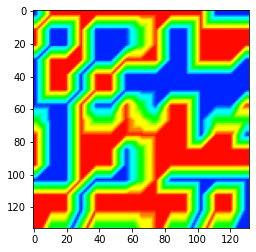

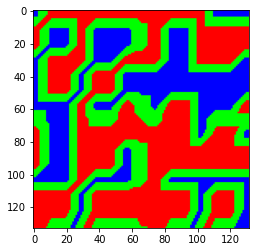

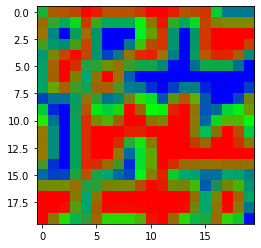

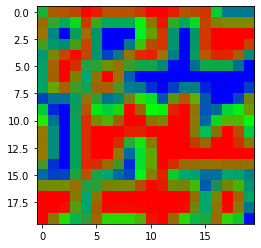

In [18]:
a,b=66.5,66.5

for i in range(len(img)):
    img[i]=img[i].crop((116-a,(397/2)-b,116+a,(397/2)+b))
    if i==0 :
        plt.imshow(img[i])
        plt.show()

    for j in range(0,img[i].size[0]):
        for k in range(0,img[i].size[1]):
            rgb = list(img[i].getpixel((j,k)))
            rgb_max = max(rgb)
            rgb_max_index = rgb.index(rgb_max)
            rgb[0],rgb[1],rgb[2]=0,0,0
            rgb[rgb_max_index]=255
            img[i].putpixel((j,k),(rgb[0],rgb[1],rgb[2]))
    if i==0 :
        plt.imshow(img[i])
        plt.show()

    
    
    img[i]=img[i].resize((20,20))
    img_t[i]=img[i]
    if i==0 :
        plt.imshow(img_t[i])
        plt.show()
    for j in range(0,img[i].size[0]):
        for k in range(0,img[i].size[1]):
            rgb = list(img[i].getpixel((j,k)))
            img_t[i].putpixel((j,k),(rgb[0],rgb[1],rgb[2]))
    if i==0:
        plt.imshow(img_t[i])
        plt.show()

for i in range(len(img)):
    for j in range(0,img[i].size[0]):
        for k in range(0,img[i].size[1]):
            rgb = list(img[i].getpixel((k,j)))
            #rgb_max = max(rgb)
            #rgb_max_index = rgb.index(rgb_max)
            #rgb_max_index = 5.0-(rgb_max_index*0.3)
            df.loc[(str(j*20+k)+'th'),str(i+1)]=rgb_to_hex(rgb[0],rgb[1],rgb[2])

### Off current [csv파일로 수정필요]

In [20]:
df.loc['400th',str(1)]=1.9394878
df.loc['400th',str(2)]=2.1590587
df.loc['400th',str(3)]=1.5884111
df.loc['400th',str(4)]=1.8279353
df.loc['400th',str(5)]=1.6635847
df.loc['400th',str(6)]=1.6591124

df.loc['400th',str(7)]=1.7442783
df.loc['400th',str(8)]=1.8547415
df.loc['400th',str(9)]=1.8952696
df.loc['400th',str(10)]=1.7013493
df.loc['400th',str(11)]=2.1705464
df.loc['400th',str(12)]=1.7385064

df.loc['400th',str(13)]=1.7869878
df.loc['400th',str(14)]=1.6719382
df.loc['400th',str(15)]=1.6763059
df.loc['400th',str(16)]=3.4915574
df.loc['400th',str(17)]=1.6476044
df.loc['400th',str(18)]=1.6875498

df.loc['400th',str(19)]=1.9931155
df.loc['400th',str(20)]=1.8491823
df.loc['400th',str(21)]=3.0733682
df.loc['400th',str(22)]=1.6429264
df.loc['400th',str(23)]=1.6114101
df.loc['400th',str(24)]=1.8306508

df.loc['400th',str(25)]=1.6791697
df.loc['400th',str(26)]=1.8911276
df.loc['400th',str(27)]=2.4842797
df.loc['400th',str(28)]=1.6076288
df.loc['400th',str(29)]=1.7941212
df.loc['400th',str(30)]=1.7273177

train=df.transpose()
train.head()

col,0th,1th,2th,3th,4th,5th,6th,7th,8th,9th,...,391th,392th,393th,394th,395th,396th,397th,398th,399th,400th
1,4.657143,4.896198,4.907170,4.915116,4.995276,4.971042,4.907170,4.907170,4.907955,4.933203,...,5.000000,4.875294,4.745882,4.630233,4.662500,4.877011,4.748047,4.668235,4.417510,1.939488
2,4.400000,4.454962,4.498141,4.729412,4.882900,4.583462,4.400000,4.574118,4.934340,4.793385,...,4.744706,4.745882,4.745882,4.749412,4.963529,4.902353,4.745882,4.745882,4.930588,2.159059
3,5.000000,5.000000,5.000000,5.000000,4.936604,4.585156,4.400000,4.572941,4.929811,5.000000,...,5.000000,4.875294,4.745882,4.617647,4.475581,4.722353,4.745882,4.664706,4.593774,1.588411
4,4.677821,4.949035,5.000000,5.000000,4.938846,4.634733,4.535849,4.675294,4.971264,4.820000,...,4.508679,4.867045,5.000000,4.859160,4.490226,4.521176,4.700000,4.700000,4.578824,1.827935
5,5.000000,5.000000,5.000000,5.000000,5.000000,4.968846,4.906391,4.782031,4.494677,4.679623,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.888235,4.702335,1.663585


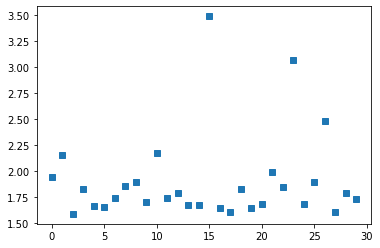

In [82]:
y=[1.9394878,2.1590587,1.5884111,1.8279353,1.6635847,1.6591124,1.7442783,1.8547415,1.8952696,1.7013493,2.1705464,1.7385064,1.7869878,1.6719382,1.6763059,3.4915574,1.6429264,1.6114101,1.8306508,1.6476044,1.6875498,1.9931155
   ,1.8491823,3.0733682,1.6791697,1.8911276,2.4842797,1.6076288,1.7941212,1.7273177]
plt.plot(y,'s')
plt.show()

### Train Data와 Test Data 분리

In [74]:
x=train[[str(x)+'th' for x in range(400) ]]
y=train['400th']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/10)
y_test

6     1.659112
10    1.701349
21    3.073368
Name: 400th, dtype: float64

## Hyperparameter Optimization 
### Use Bayesian optimization

In [76]:
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 탐색 대상 함수 (XGBRegressor)
def XGB_cv(max_depth,learning_rate, n_estimators
             ,min_child_weight, subsample
             ,colsample_bytree, silent=True, nthread=-1):

    # 모델 정의
    model = xgb.XGBRegressor(objective='reg:squarederror',max_depth=int(max_depth),
                                learning_rate=learning_rate,
                                n_estimators=int(n_estimators),
                                min_child_weight=min_child_weight,
                                subsample=subsample,
                                colsample_bytree=colsample_bytree, 
                                nthread=nthread
                                )
    # 모델 훈련
    model.fit(x_train, y_train)

    # 예측값 출력
    y_pred= model.predict(x_test)

    # 각종 metric 계산
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # 오차 최적화로 사용할 metric 반환
    return r2

In [77]:
# 실험해보고자하는 hyperparameter 집합
pbounds = {'max_depth': (3, 10),
                'learning_rate': (0.01, 0.8),
                'n_estimators': (100, 2000),
                'min_child_weight': (0, 3),
                'subsample': (0.5, 1),
                'colsample_bytree' :(0.2, 1)
                }

# Bayesian optimization 객체 생성
# f : 탐색 대상 함수, pbounds : hyperparameter 집합
# verbose = 2 항상 출력, verbose = 1 최댓값일 때 출력, verbose = 0 출력 안함
# random_state : Bayesian Optimization 상의 랜덤성이 존재하는 부분을 통제 
bo=BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=2, random_state=1 )    

# 메소드를 이용해 최대화 과정 수행
# init_points :  초기 Random Search 갯수
# n_iter : 반복 횟수 (몇개의 입력값-함숫값 점들을 확인할지! 많을 수록 정확한 값을 얻을 수 있다.)
# acq : Acquisition Function들 중 Expected Improvement(EI) 를 사용
# xi : exploration 강도 (기본값은 0.0)
bo.maximize(init_points=2, n_iter=40, acq='ei', xi=0.01)

# ‘iter’는 반복 회차, ‘target’은 목적 함수의 값, 나머지는 입력값을 나타냅니다. 
# 현재 회차 이전까지 조사된 함숫값들과 비교하여, 현재 회차에 최댓값이 얻어진 경우, 
# bayesian-optimization 라이브러리는 이를 자동으로 다른 색 글자로 표시하는 것을 확인할 수 있습니다

# 찾은 파라미터 값 확인
print(bo.max)


|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.4086   |  0.5336   |  0.5791   |  3.001    |  0.907    |  378.8    |  0.5462   |
|  2        |  0.9226   |  0.349    |  0.283    |  5.777    |  1.616    |  896.5    |  0.8426   |
|  3        |  0.2632   |  0.5205   |  0.6335   |  5.53     |  1.585    |  895.9    |  0.5213   |
|  4        |  0.8015   |  0.6782   |  0.2615   |  7.641    |  1.345    |  427.2    |  0.6515   |
|  5        |  0.4294   |  0.9177   |  0.4284   |  3.413    |  2.512    |  531.1    |  0.5926   |
|  6        |  0.7671   |  0.5276   |  0.1066   |  8.11     |  2.604    |  1.359e+0 |  0.6975   |
|  7        |  0.6891   |  0.9334   |  0.08474  |  9.907    |  2.841    |  125.3    |  0.727    |
|  8        |  0.7969   |  0.7552   |  0.4632   |  5.304    |  2.129    |  1.615e+0 |  0.5152   |
|  9        |  0.697

### 모델 확정

In [78]:

from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror',max_depth=int(4.633887025168587)
                                ,learning_rate= 0.17096258551839347
                                ,n_estimators=int(1556.67857241817)
                                ,min_child_weight=1.7557653724003903
                                ,subsample= 0.9828894429463833
                                ,colsample_bytree=0.8066556303089625      
                                )
                                

### 신뢰도 확인 및 정확도

In [79]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})
result['ratio(%)'] = abs((result['pred'] - result['real']) / result['real']) * 100
result.head()

,pred,real,ratio(%)
6,1.641080,1.659112,1.086855
10,1.726628,1.701349,1.485807
21,3.012280,3.073368,1.987656


In [80]:
mean_ratio = np.mean(result['ratio(%)'])

print('{:.3f}%'.format(100-mean_ratio))

98.480%


### To PDF

In [49]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
!jupyter nbconvert --to PDF '/content/drive/My Drive/Colab Notebooks/WFV_XGBoost_Bayesian-opt.ipynb'

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/WFV_XGBoost_Bayesian-opt.ipynb to PDF
[NbConvertApp] Support files will be in WFV_XGBoost_Bayesian-opt_files/
[NbConvertApp] Making directory ./WFV_XGBoost_Bayesian-opt_files
[NbConvertApp] Making directory ./WFV_XGBoost_Bayesian-opt_files
[NbConvertApp] Making directory ./WFV_XGBoost_Bayesian-opt_files
[NbConvertApp] Making directory ./WFV_XGBoost_Bayesian-opt_files
[NbConvertApp] Writing 95551 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 124952 bytes to /content/drive/My Drive/Colab Notebooks/WFV_XGBoost_Bayesian-opt.pdf
